## Load data

In [161]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
file_list=[]


for filename in os.listdir('./data/output/'):
    if filename.endswith(".pkl"): # and '2008' in filename or '2009' in filename or '2010' in filename:
        unpickle = './data/output/'+str(filename)
        print(unpickle)
        file_list.append(pd.read_pickle(unpickle))
 
 
MASTER = pd.concat(file_list)
MASTER['time'] = pd.to_datetime(MASTER['time'])

print(MASTER.columns)

./data/output/df2013.pkl
./data/output/df2012.pkl
./data/output/df2010.pkl
./data/output/df2011.pkl
./data/output/df2015.pkl
./data/output/df2014.pkl
./data/output/df2016.pkl
./data/output/df2017.pkl
./data/output/df2019.pkl
./data/output/df2018.pkl
./data/output/df2008.pkl
./data/output/df2020.pkl
./data/output/df2009.pkl
Index(['ColumnCode', 'ColumnDescription', 'ItemDescription', 'ItemNumber',
       'Value', 'TableNumber', 'Type', 'Description', 'TheYear', 'TheMonth',
       'TheDay', 'InstitutionCode', 'InstitutionDescription', 'LastModified',
       'time'],
      dtype='object')


## Show banks

In [ ]:
all=MASTER['InstitutionDescription'].unique()

## Make asset weights

In [ ]:
 #need assets_to_weights.py 
from assets_to_weights import *


years=[str(i) for i in range(2008,2020, 1)]
months=["{:02d}".format(i) for i in range(1,13)]

helper_dict={}

for y in years:
    helper_dict[y]=months
    
BANK = MASTER[MASTER['InstitutionDescription']=='ABSA BANK LTD ']
BANK['Value'] = pd.to_numeric(BANK['Value'])

bank_year_and_month = []
for key in helper_dict.keys():
    for month in helper_dict[key]:
        
        df_bank_key_month =  BANK[(BANK['TheYear']==key)&(BANK['TheMonth']==month)]
#         print((month),(key),df_bank_key_month )
        try:
            bank_year_and_month.append(get_pf_weights_by_bank_29(df_bank_key_month))
        except:
            pass
 
absa=pd.concat(bank_year_and_month) 

# we only need one entry per month - so select column code 7 and itemnumber 2 for example 
absa_weights=absa[(absa['ColumnCode']=='7')&(absa['ItemNumber']=='2')]
absa_weights.index=absa_weights.time

f = plt.figure()
plt.title('ABSA portfolio weights', color='black')
 
for column in absa_weights[absa.columns[-19:-10]]:
    absa_weights[column].plot(legend=column, ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [ ]:
volumes =  [0,500,1000,1500,2000,2500,3000,3500,4000]

# Show mortgages for top 4 banks

In [189]:
# show portfolio weights for absa's credit book
from assets_to_weights import *

transform=tranformer()

years=[str(i) for i in range(2008,2021, 1)]
months=["{:02d}".format(i) for i in range(1,13)]


top5=[ 'ABSA BANK LTD ',\
        'THE STANDARD BANK OF S A LTD ',\
        MASTER[MASTER['InstitutionDescription'].str.contains('NEDBANK')]['InstitutionDescription'].values[0],\
        MASTER[MASTER['InstitutionDescription'].str.contains('FIRSTRAND')]['InstitutionDescription'].values[0],\
        MASTER[MASTER['InstitutionDescription'].str.contains('CAPITEC BANK')]['InstitutionDescription'].values[0]
      ]

df=MASTER[MASTER.InstitutionDescription.isin(top5)]
arr = np.empty((0,len(df[df['InstitutionDescription'].str.contains('ABSA BANK LTD ')].time.unique()))) 
 
for b in top5:
    test=transform.get_bankdata(years,months,df, b)

    # # we only need one entry per month - so select column code 7 and itemnumber 2 for example 
    test_weights=test[(test['ColumnCode']=='7')&(test['ItemNumber']=='2')]
    test_weights.index=test_weights.time
    # f = plt.figure()
    # plt.title('ABSA portfolio weights', color='black') 
    # for column in test_weights[test.columns[-19:-10]]:
    #     test_weights[column].plot(legend=column, ax=f.gca())
    # plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    # plt.show()
    weights_only=test_weights[test_weights.columns[-29:]] 
    d=weights_only.filter(like='Household_mortgages').squeeze().values 
    arr=np.vstack((arr,d))
 
 

/Users/admin/git_repos/ba900/assets_to_weights.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BANK['Value'] = pd.to_numeric(BANK['Value'])
/Users/admin/git_repos/ba900/assets_to_weights.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["m{}_{}".format(count,name)]= 0
/Users/admin/git_repos/ba900/assets_to_weights.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

all data returned for  ABSA BANK LTD 
all data returned for  THE STANDARD BANK OF S A LTD 
all data returned for  NEDBANK LTD 
all data returned for  FIRSTRAND BANK LIMITED 
all data returned for  CAPITEC BANK 


Text(0.5, 1.0, 'Average portfolio weight mortages bank top 5 banks')

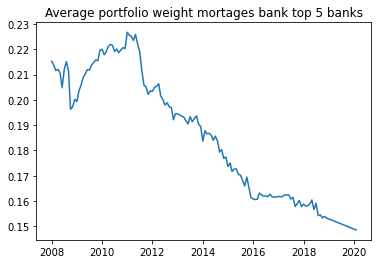

In [190]:

#Mean of all banks
import matplotlib.pyplot as plt
plt.plot(test_weights.time,np.mean(arr,axis=0)  )
plt.title('Average portfolio weight mortages bank top 5 banks')

In [192]:
all=MASTER['InstitutionDescription'].unique()
banks=list(all)[:33]
count=0
arr = np.empty((0,len(df[df['InstitutionDescription'].str.contains('ABSA BANK LTD ')].time.unique()))) 


for b in banks:
    test=transform.get_bankdata(years,months,MASTER, b)

    # # we only need one entry per month - so select column code 7 and itemnumber 2 for example 
    test_weights=test[(test['ColumnCode']=='7')&(test['ItemNumber']=='2')]
    test_weights.index=test_weights.time
    # f = plt.figure()
    # plt.title('ABSA portfolio weights', color='black') 
    # for column in test_weights[test.columns[-19:-10]]:
    #     test_weights[column].plot(legend=column, ax=f.gca())
    # plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    # plt.show()
    weights_only=test_weights[test_weights.columns[-29:]] 
    d=weights_only.filter(like='Household_mortgages').squeeze().values 
    
    try:
        arr=np.vstack((arr,d))
    except:
        print(b,'did not work')
    count+=1
    print(count)


all data returned for  SASFIN BANK LTD 
1
all data returned for  BIDVEST BANK LIMITED 
2
all data returned for  BNP PARIBAS SA 
BNP PARIBAS SA  did not work
3
all data returned for  STATE BANK OF INDIA 
4
all data returned for  NEDBANK LTD 
5
all data returned for  ALBARAKA BANK LTD 
6
all data returned for  ABSA BANK LTD 
7
all data returned for  GBS MUTUAL BANK 
8
all data returned for  BANK OF TAIWAN SOUTH AFRICA     BRANCH 
9
all data returned for  INVESTEC BANK LTD 
10
all data returned for  HABIB OVERSEAS BANK LTD 
11
all data returned for  SOCIETE GENERALE JOHANNESBURG   BRANCH 
12
all data returned for  AFRICAN BANK LIMITED 
13
all data returned for  JPMORGAN CHASE BANK             
14
all data returned for  GRINDROD BANK LTD 
15
all data returned for  CITIBANK N.A 
16
all data returned for  CAPITEC BANK 
17
all data returned for  VBS MUTUAL BANK 
18
all data returned for  BANK OF CHINA LTD JHB BRANCH    
19
all data returned for  CANARA BANK 
CANARA BANK  did not work
20
all d

Text(0.5, 1.0, 'Average portfolio weight mortages all banks')

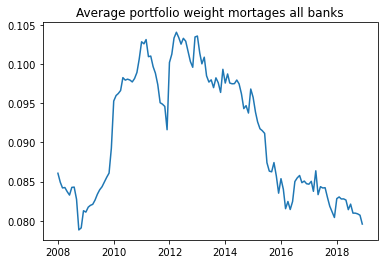

In [193]:
 
#Mean of all banks
import matplotlib.pyplot as plt
plt.plot(test_weights.time,np.mean(arr,axis=0)  )
plt.title('Average portfolio weight mortages all banks')

## Household mortgage credit for SA top 5

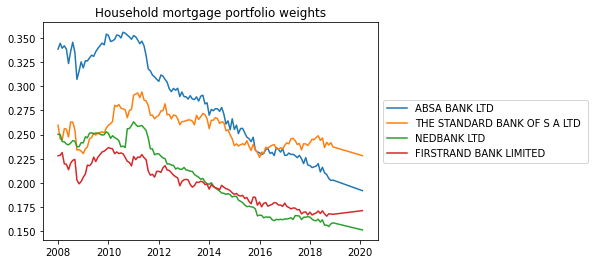

In [170]:
# show portfolio weights for absa's credit book
from assets_to_weights import *

transform=tranformer()

years=[str(i) for i in range(2008,2021, 1)]
months=["{:02d}".format(i) for i in range(1,13)]


top5=[ 'ABSA BANK LTD ',\
        'THE STANDARD BANK OF S A LTD ',\
        MASTER[MASTER['InstitutionDescription'].str.contains('NEDBANK')]['InstitutionDescription'].values[0],\
        MASTER[MASTER['InstitutionDescription'].str.contains('FIRSTRAND')]['InstitutionDescription'].values[0],\
        MASTER[MASTER['InstitutionDescription'].str.contains('CAPITEC BANK')]['InstitutionDescription'].values[0]
      ]

df=MASTER[MASTER.InstitutionDescription.isin(top5)]
arr = np.empty((0,len(df[df['InstitutionDescription'].str.contains('ABSA BANK LTD ')].time.unique()))) 
 
for b in top5:
    test=transform.get_bankdata(years,months,df, b)

    # # we only need one entry per month - so select column code 7 and itemnumber 2 for example 
    test_weights=test[(test['ColumnCode']=='7')&(test['ItemNumber']=='2')]
    test_weights.index=test_weights.time
    # f = plt.figure()
    # plt.title('ABSA portfolio weights', color='black') 
    # for column in test_weights[test.columns[-19:-10]]:
    #     test_weights[column].plot(legend=column, ax=f.gca())
    # plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    # plt.show()
    weights_only=test_weights[test_weights.columns[-29:]] 
    d=weights_only.filter(like='Household_mortgages').squeeze().values 
    arr=np.vstack((arr,d))
    
import matplotlib.pyplot as plt

top5=[ 'ABSA BANK LTD ',\
        'THE STANDARD BANK OF S A LTD ',\
        MASTER[MASTER['InstitutionDescription'].str.contains('NEDBANK')]['InstitutionDescription'].values[0],\
        MASTER[MASTER['InstitutionDescription'].str.contains('FIRSTRAND')]['InstitutionDescription'].values[0],\
        MASTER[MASTER['InstitutionDescription'].str.contains('CAPITEC BANK')]['InstitutionDescription'].values[0]
      ]

f = plt.figure()
plt.title('Household mortgage portfolio weights', color='black')
 
for i,name in zip(arr[:-1],top5[:-1]):
    plt.plot(test_weights.time,i , label=name)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()
 

In [142]:
weights_only.filter(like='Household_mortgages').squeeze().values 

array([0.25960144, 0.245513  , 0.24422092, 0.25612439, 0.25552579,
       0.24741084, 0.26292057, 0.26287043, 0.25490991, 0.23394   ,
       0.23441237, 0.23291089, 0.23031501, 0.23527679, 0.23709253,
       0.24554587, 0.24675719, 0.25147671, 0.2494859 , 0.25140707,
       0.25281239, 0.25186861, 0.25670306, 0.25965913, 0.26133534,
       0.26340329, 0.28022958, 0.27897734, 0.28103515, 0.277361  ,
       0.27647767, 0.27546591, 0.26742213, 0.27480853, 0.27598066])

# Show weights of one bank


In [ ]:
# show portfolio weights for absa's credit book
from assets_to_weights import *

transform=tranformer()
    
years=[str(i) for i in range(2008,2020, 1)]
months=["{:02d}".format(i) for i in range(1,13)]
helper_dict={}
for y in years:
    helper_dict[y]=months
    
BANK = MASTER[MASTER['InstitutionDescription']=='ABSA BANK LTD ']
BANK['Value'] = pd.to_numeric(BANK['Value'])

bank_year_and_month = []
for key in helper_dict.keys():
    for month in helper_dict[key]:
        
        df_bank_key_month =  BANK[(BANK['TheYear']==key)&(BANK['TheMonth']==month)]
#         print((month),(key),df_bank_key_month )
        try:
            bank_year_and_month.append(transform.get_pf_weights_by_bank_29(df_bank_key_month))
        except:
            pass
 
absa=pd.concat(bank_year_and_month) 

# we only need one entry per month - so select column code 7 and itemnumber 2 for example 
absa_weights=absa[(absa['ColumnCode']=='7')&(absa['ItemNumber']=='2')]
absa_weights.index=absa_weights.time

f = plt.figure()
plt.title('ABSA portfolio weights', color='black')
 
for column in absa_weights[absa.columns[-19:-10]]:
    absa_weights[column].plot(legend=column, ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()
 